# A SimpleITK Hello World Example

This example constructs a 128x128 greyscale image, draws a smiley face made of Gaussian blobs, and calls the Show function to display with image with Fiji.  Each piece of the face is created as a seperate image and then combined into the result using arithmetic operators.

It comes from the [SimpleITK ReadTheDocs page](https://simpleitk.readthedocs.io/en/master/Examples/HelloWorld/Documentation.html) where you can see the example written in all 8 languages SimpleITK supports.

## Creating the image

In [2]:
!pip install SimpleITK matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 13.2 MB/s eta 0:00:00


In [3]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

def draw(img, size=[3,3], cmap=plt.cm.Greys_r):
  # Convert the image to a numpy_array to use matplotlib for display
  numpy_array = sitk.GetArrayViewFromImage(img)
  figure = plt.figure(figsize=size)
  plt.imshow(numpy_array, cmap)
  plt.axis('off')

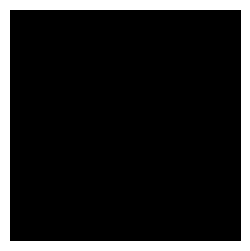

In [4]:
# Create an image
pixelType = sitk.sitkUInt8
imageSize = [128, 128]
image     = sitk.Image( imageSize, pixelType )
draw(image)

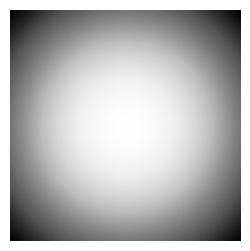

In [5]:
# Create a face image
faceSize   = [64, 64]
faceCenter = [64, 64]
face       = sitk.GaussianSource(pixelType, imageSize, faceSize, faceCenter)
draw(face)

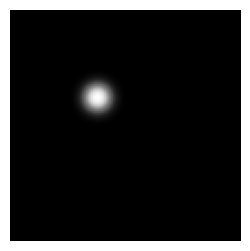

In [6]:
# Create eye images
eyeSize    = [5, 5]
eye1Center = [48, 48]
eye2Center = [80, 48]
eye1       = sitk.GaussianSource(pixelType, imageSize, eyeSize, eye1Center, 150)
eye2       = sitk.GaussianSource(pixelType, imageSize, eyeSize, eye2Center, 150)
draw(eye1)

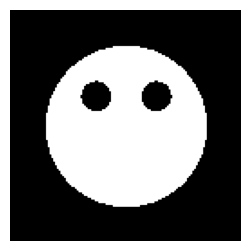

In [7]:
# Apply the eyes to the face
face = face - eye1 - eye2
face = sitk.BinaryThreshold(face, 200, 255, 255)
draw(face)

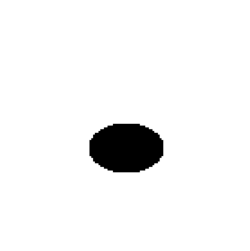

In [8]:
# Create the mouth
mouthRadii  = [30, 20]
mouthCenter = [64, 76]
mouth       = 255 - sitk.BinaryThreshold( sitk.GaussianSource(pixelType, imageSize, mouthRadii, mouthCenter),
                                          200, 255, 255 )
draw(mouth)

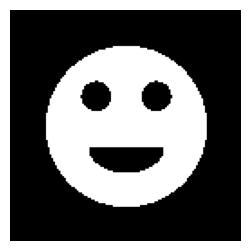

In [9]:
# Paste the mouth into the face
mouthSize = [64, 18]
mouthLoc  = [32, 76]
face      = sitk.Paste(face, mouth, mouthSize, mouthLoc, mouthLoc)
draw(face)

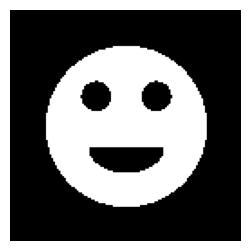

In [10]:
# Apply the face to the original image
image = image+face
draw(image)

In [11]:
# Display the results in Fiji.  To download Fiji, go to http://fiji.sc/#download
sitk.Show( image, title="Hello World: Python", debugOn=True )

RuntimeError: Exception thrown in SimpleITK Show: /tmp/SimpleITK/Code/IO/src/sitkImageViewer.cxx:755:
sitk::ERROR: No ImageJ/Fiji application found.